In [34]:
guu='gwangjin'
fyear= '2016'
fmon= '01'
filePath= 'data/weather/'+guu+'gu/'+guu+fyear+fmon+'.htm'
filePath
# file:///E:/github/proj_sponge_bicycle/

'data/weather/gwangjingu/gwangjin201601.htm'

# Fail!
scaping을 html 껍데기만 하고, JS button은 아직 넘지 못 했다

### htm read: table to dataframe
1. asp read
    - 버튼클릭 후 https://stackoverflow.com/questions/46395314/scraping-aspx-page-with-python
2. all same?
    - https://python-forum.io/Thread-Scraping-aspx-page
3. beautifulsoup table to dataframe

#### JS 결과값 따오는 순서
http://aws.seoul.go.kr/Report/RptWeatherMonth.asp
1. AWS_ID (select) value 값에 따라 선택후 (>=1151) get_text()중 해당하는 것만
    - 모든 지역구를 가져오는 게 아님!
    - 원하는 문자열일때만 반환. beautifulsoup desired some text
    https://stackoverflow.com/questions/39913686/beautifulsoup-extract-text-with-tags-as-text
2. RptSDATE (조회일자) value값에 2016-12 넣고
3. btnSearch01 (조회) 버튼 클릭 후 3초
4. 월 이동 버튼 input[name='BtnAddMM1'] 클릭 후 3초
5. 첫 번째 table을 다운로드
> (4,5)번을 24회 반복


### html 껍데기
클릭해도 당연히 무반응
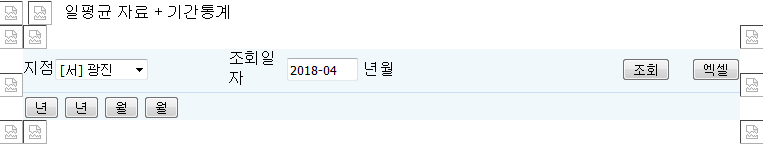

In [35]:
from bs4 import BeautifulSoup
import requests

In [36]:
url= 'http://aws.seoul.go.kr/Report/RptWeatherMonth.asp'

In [37]:
url_get= requests.get(url)

In [39]:
url_get

<Response [200]>

In [11]:
soup= BeautifulSoup(url_get.content, 'lxml')

In [13]:
# soup

# JS버튼 클릭후 결과
asp라서 안 긁히는게 아니다!
https://stackoverflow.com/questions/46395314/scraping-aspx-page-with-python
1. check my browser header python - 헤더 뭘로해야 함?
10. 버튼 클릭한 후 결과 값 가져오기

#### 내 헤더?

#### 는 모르겠고 아예 가짜로 만들 수 있는 게 있네
my browser header python
https://stackoverflow.com/questions/27652543/how-to-use-python-requests-to-fake-a-browser-visit

In [7]:
!pip install fake_useragent

  Running setup.py bdist_wheel for fake-useragent: started
  Running setup.py bdist_wheel for fake-useragent: finished with status 'done'
  Stored in directory: C:\Users\kitcoop\AppData\Local\pip\Cache\wheels\07\04\1d\bbd8ba7d692add504b44552504b7df239bddf56aa3387cee2b
Successfully built fake-useragent


In [8]:
from fake_useragent import UserAgent

In [10]:
# 꽤 오래걸림
ua= UserAgent()

In [28]:
#ua.data #온갖 브라우저가 미리 들어가 있음

In [34]:
#실행마다 다른 게 들어간다
ua.chrome

'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'

In [22]:
ua.random

'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36'

In [15]:
type(ua.firefox)

str

In [6]:
import urllib
from bs4 import BeautifulSoup
import requests

In [35]:
uaChrome= ua.chrome

headers= {
    'User-Agent':uaChrome
}

In [17]:
url= 'http://aws.seoul.go.kr/Report/RptWeatherMonth.asp'

### JS:버튼 클릭 지시?
1. selenium
2. selenium + PhantomJS
3. robobrowser, MechanicalSoup

In [28]:
# python 2코드라 동작이 안됨
# from selenium import webdriver
# import time
# # https://stackoverflow.com/questions/16421074/newbie-how-to-overcome-javascript-onclick-button-to-scrape-web-page

#### 2
C:\Users\kitcoop\Downloads\install\phantomjs-2.1.1-windows\bin\phantomjs.exe
- http://phantomjs.org/download.html

#### 긁히는지 확인- 아직은 껍데기만

In [7]:
url= 'http://aws.seoul.go.kr/Report/RptWeatherMonth.asp'

In [8]:
url_get= requests.get(url)

In [9]:
url_get

<Response [200]>

In [10]:
soup= BeautifulSoup(url_get.content, 'lxml')
# soup